In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random 
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

In [3]:
temp_df = pd.read_csv('mean_absolute_diff.csv', index_col=False)

In [4]:
temp_df.round(1)

,Allocation,Race,1.0,0.0,1-0.1,1-0.2,1-0.3,1-0.4,1-0.5,1-0.6,1-0.7,1-0.8,1-0.9
0,Lottery,Hispanic,4.9,75.4,66.0,59.2,53.5,46.8,38.0,30.0,23.3,14.0,7.3
1,Lottery,White,4.7,73.2,55.1,51.4,44.8,41.1,35.9,28.4,20.3,15.7,6.0
2,Lottery,Asian,16.0,100.0,69.9,56.3,42.2,27.8,27.9,14.4,1.2,1.4,0.2
3,Lottery,Black or African American,5.9,76.9,65.2,56.6,50.8,42.4,35.1,25.3,18.0,10.8,3.8
4,New York,Hispanic,4.9,75.4,61.8,52.4,43.7,37.2,30.2,24.6,18.4,12.4,5.8
5,New York,White,4.7,73.2,61.1,52.1,44.7,37.8,30.4,23.3,16.7,8.2,3.5
6,New York,Asian,15.4,100.0,60.2,50.4,41.9,31.1,19.3,18.1,2.5,1.0,1.7
7,New York,Black or African American,5.9,76.9,64.3,60.5,52.6,45.9,40.4,32.4,24.3,18.6,9.7
8,Maryland,Hispanic,4.9,75.4,61.5,54.8,44.3,37.3,31.3,25.8,19.4,12.3,7.3
9,Maryland,White,4.6,73.2,60.6,50.1,44.7,36.8,26.8,24.1,16.0,8.0,2.8


In [5]:
print(temp_df.round(1).to_latex(index=False))  

\begin{tabular}{llrrrrrrrrrrr}
\toprule
     Allocation &                       Race &   1.0 &    0.0 &  1-0.1 &  1-0.2 &  1-0.3 &  1-0.4 &  1-0.5 &  1-0.6 &  1-0.7 &  1-0.8 &  1-0.9 \\
\midrule
        Lottery &                   Hispanic &   4.9 &   75.4 &   66.0 &   59.2 &   53.5 &   46.8 &   38.0 &   30.0 &   23.3 &   14.0 &    7.3 \\
        Lottery &                      White &   4.7 &   73.2 &   55.1 &   51.4 &   44.8 &   41.1 &   35.9 &   28.4 &   20.3 &   15.7 &    6.0 \\
        Lottery &                      Asian &  16.0 &  100.0 &   69.9 &   56.3 &   42.2 &   27.8 &   27.9 &   14.4 &    1.2 &    1.4 &    0.2 \\
        Lottery &  Black or African American &   5.9 &   76.9 &   65.2 &   56.6 &   50.8 &   42.4 &   35.1 &   25.3 &   18.0 &   10.8 &    3.8 \\
       New York &                   Hispanic &   4.9 &   75.4 &   61.8 &   52.4 &   43.7 &   37.2 &   30.2 &   24.6 &   18.4 &   12.4 &    5.8 \\
       New York &                      White &   4.7 &   73.2 &   61.1 &   

### Asian

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100
def absolute_deviation(median, row):
    return abs(median - row.percent_difference)
def modified_zscore(median, row):
    return (0.6745 * (row.percent_difference - median)) / row.MAD

In [4]:
all_df_list = []

#### Lottery

In [5]:
race_var  = 'Asian'
hispanic_df = lot_df[lot_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
9,Asian,7.000,0.0,487.000,100.000000,NaN,6.004,0.996,14.228571,Lottery,0.830418,10.814921,-0.051791,0
16,Asian,6.004,0.1,437.899,85.771429,NaN,5.050,0.954,15.889407,Lottery,0.830418,10.814921,0.051791,0
26,Asian,5.050,0.2,400.117,72.142857,NaN,4.046,1.004,19.881188,Lottery,4.822199,10.814921,0.300749,0
33,Asian,4.046,0.3,360.875,57.800000,NaN,3.076,0.970,23.974296,Lottery,8.915306,10.814921,0.556026,0
45,Asian,3.076,0.4,318.644,43.942857,NaN,3.063,0.013,0.422627,Lottery,14.636362,10.814921,-0.912834,0
52,Asian,3.063,0.5,272.878,43.757143,NaN,2.117,0.946,30.884754,Lottery,15.825764,10.814921,0.987014,0
59,Asian,2.117,0.6,222.977,30.242857,NaN,1.204,0.913,43.127067,Lottery,28.068077,10.814921,1.750537,0
69,Asian,1.204,0.7,177.051,17.200000,NaN,1.240,-0.036,-2.990033,Lottery,18.049022,10.814921,-1.125673,0
76,Asian,1.240,0.8,124.517,17.714286,NaN,1.109,0.131,10.564516,Lottery,4.494473,10.814921,-0.280309,0
79,Asian,1.109,0.9,74.190,15.842857,NaN,1.083,0.026,2.344454,Lottery,12.714535,10.814921,-0.792974,0


#### New York

In [6]:
hispanic_df = ny_df[ny_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
11,Asian,7.000,0.0,487.000,100.000000,NaN,5.323,1.677,23.957143,New York,10.849553,8.862081,0.825768,0
20,Asian,5.323,0.1,433.050,76.042857,NaN,4.615,0.708,13.300770,New York,0.193180,8.862081,0.014703,0
26,Asian,4.615,0.2,378.396,65.928571,NaN,4.019,0.596,12.914410,New York,0.193180,8.862081,-0.014703,0
36,Asian,4.019,0.3,324.595,57.414286,NaN,3.248,0.771,19.183877,New York,6.076287,8.862081,0.462471,0
44,Asian,3.248,0.4,279.014,46.400000,NaN,2.472,0.776,23.891626,New York,10.784036,8.862081,0.820781,0
46,Asian,2.472,0.5,233.655,35.314286,NaN,2.363,0.109,4.409385,New York,8.698205,8.862081,-0.662027,0
57,Asian,2.363,0.6,191.496,33.757143,NaN,1.303,1.060,44.858231,New York,31.750641,8.862081,2.416566,0
68,Asian,1.303,0.7,149.028,18.614286,NaN,1.176,0.127,9.746738,New York,3.360852,8.862081,-0.255797,0
75,Asian,1.176,0.8,104.948,16.800000,NaN,1.128,0.048,4.081633,New York,9.025957,8.862081,-0.686973,0
83,Asian,1.128,0.9,67.037,16.114286,NaN,1.106,0.022,1.950355,New York,11.157235,8.862081,-0.849186,0


#### Maryland

In [7]:
hispanic_df = mar_df[mar_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Asian,7.000,0.0,487.000,100.000000,NaN,5.009,1.991,28.442857,Maryland,26.919190,2.297597,7.902602,1
19,Asian,5.009,0.1,432.379,71.557143,NaN,5.016,-0.007,-0.139748,Maryland,1.663416,2.297597,-0.488325,0
22,Asian,5.016,0.2,379.791,71.657143,NaN,4.019,0.997,19.876396,Maryland,18.352728,2.297597,5.387766,1
30,Asian,4.019,0.3,330.041,57.414286,NaN,4.019,0.000,0.000000,Maryland,1.523667,2.297597,-0.447299,0
45,Asian,4.019,0.4,288.334,57.414286,NaN,4.019,0.000,0.000000,Maryland,1.523667,2.297597,-0.447299,0
52,Asian,4.019,0.5,243.638,57.414286,NaN,4.018,0.001,0.024882,Maryland,1.498785,2.297597,-0.439995,0
58,Asian,4.018,0.6,208.782,57.400000,NaN,1.166,2.852,70.980587,Maryland,69.456920,2.297597,20.390300,1
69,Asian,1.166,0.7,157.018,16.657143,NaN,1.212,-0.046,-3.945111,Maryland,5.468779,2.297597,-1.605456,0
76,Asian,1.212,0.8,106.540,17.314286,NaN,1.158,0.054,4.455446,Maryland,2.931778,2.297597,0.860675,0
81,Asian,1.158,0.9,72.091,16.542857,NaN,1.123,0.035,3.022453,Maryland,1.498785,2.297597,0.439995,0


#### Youngest

In [8]:
hispanic_df = youngest_df[youngest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
8,Asian,7.000,0.0,487.000,100.000000,NaN,6.010,0.990,14.142857,Youngest,3.190339,11.012379,0.195406,0
21,Asian,6.010,0.1,449.971,85.857143,NaN,6.003,0.007,0.116473,Youngest,10.836046,11.012379,-0.663700,0
28,Asian,6.003,0.2,406.845,85.757143,NaN,6.009,-0.006,-0.099950,Youngest,11.052469,11.012379,-0.676955,0
33,Asian,6.009,0.3,363.732,85.842857,NaN,5.058,0.951,15.826261,Youngest,4.873742,11.012379,0.298513,0
44,Asian,5.058,0.4,326.387,72.257143,NaN,5.059,-0.001,-0.019771,Youngest,10.972289,11.012379,-0.672045,0
51,Asian,5.059,0.5,282.179,72.271429,NaN,3.074,1.985,39.237003,Youngest,28.284485,11.012379,1.732404,0
59,Asian,3.074,0.6,242.113,43.914286,NaN,2.123,0.951,30.936890,Youngest,19.984371,11.012379,1.224028,0
67,Asian,2.123,0.7,193.757,30.328571,NaN,1.199,0.924,43.523316,Youngest,32.570797,11.012379,1.994937,0
76,Asian,1.199,0.8,141.023,17.128571,NaN,1.211,-0.012,-1.000834,Youngest,11.953353,11.012379,-0.732134,0
84,Asian,1.211,0.9,90.302,17.300000,NaN,1.117,0.094,7.762180,Youngest,3.190339,11.012379,-0.195406,0


#### Max Life Years

In [9]:
hispanic_df = max_lives_df[max_lives_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Asian,7.000,0.0,487.000,100.000000,NaN,6.002,0.998,14.257143,Max Life Years,4.662585,10.309126,0.305061,0
17,Asian,6.002,0.1,432.386,85.742857,NaN,4.028,1.974,32.889037,Max Life Years,23.294479,10.309126,1.524099,0
28,Asian,4.028,0.2,382.825,57.542857,NaN,4.014,0.014,0.347567,Max Life Years,9.246991,10.309126,-0.605007,0
36,Asian,4.014,0.3,330.027,57.342857,NaN,4.016,-0.002,-0.049826,Max Life Years,9.644383,10.309126,-0.631008,0
42,Asian,4.016,0.4,288.270,57.371429,NaN,3.063,0.953,23.730080,Max Life Years,14.135522,10.309126,0.924851,0
48,Asian,3.063,0.5,252.318,43.757143,NaN,3.064,-0.001,-0.032648,Max Life Years,9.627206,10.309126,-0.629884,0
59,Asian,3.064,0.6,212.753,43.771429,NaN,2.126,0.938,30.613577,Max Life Years,21.019019,10.309126,1.375221,0
68,Asian,2.126,0.7,162.949,30.371429,NaN,1.160,0.966,45.437441,Max Life Years,35.842883,10.309126,2.345109,0
75,Asian,1.160,0.8,108.336,16.571429,NaN,1.176,-0.016,-1.379310,Max Life Years,10.973868,10.309126,-0.717992,0
82,Asian,1.176,0.9,72.093,16.800000,NaN,1.118,0.058,4.931973,Max Life Years,4.662585,10.309126,-0.305061,0


#### Sickest First

In [10]:
hispanic_df = sickest_df[sickest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
12,Asian,7.000,0.0,487.000,100.000000,NaN,7.000,0.000,0.000000,Sickest First,7.007542,7.27698,-0.649526,0
18,Asian,7.000,0.1,454.482,100.000000,NaN,6.101,0.899,12.842857,Sickest First,5.835315,7.27698,0.540873,0
29,Asian,6.101,0.2,413.206,87.157143,NaN,6.115,-0.014,-0.229471,Sickest First,7.237013,7.27698,-0.670795,0
37,Asian,6.115,0.3,369.298,87.357143,NaN,5.145,0.970,15.862633,Sickest First,8.855091,7.27698,0.820774,0
44,Asian,5.145,0.4,319.314,73.500000,NaN,4.208,0.937,18.211856,Sickest First,11.204314,7.27698,1.038523,0
50,Asian,4.208,0.5,280.011,60.114286,NaN,3.232,0.976,23.193916,Sickest First,16.186374,7.27698,1.500308,0
60,Asian,3.232,0.6,234.317,46.171429,NaN,3.242,-0.010,-0.309406,Sickest First,7.316948,7.27698,-0.678205,0
65,Asian,3.242,0.7,190.084,46.314286,NaN,3.232,0.010,0.308452,Sickest First,6.699091,7.27698,-0.620936,0
76,Asian,3.232,0.8,142.671,46.171429,NaN,1.109,2.123,65.686881,Sickest First,58.679339,7.27698,5.438961,1
84,Asian,1.109,0.9,91.131,15.842857,NaN,1.096,0.013,1.172227,Sickest First,5.835315,7.27698,-0.540873,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For Asian Patients')

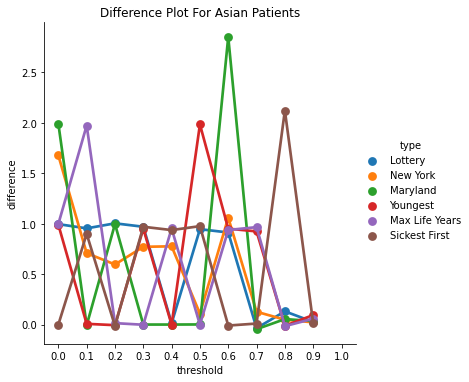

In [11]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For Asian Patients')